# Part 1 : Exploratory Data Analysis(EDA)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
data = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/train.csv')

In [77]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* Categorical : Embarked, Sex
* Ordinal : Pclass
* Continuous : Age

In [78]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

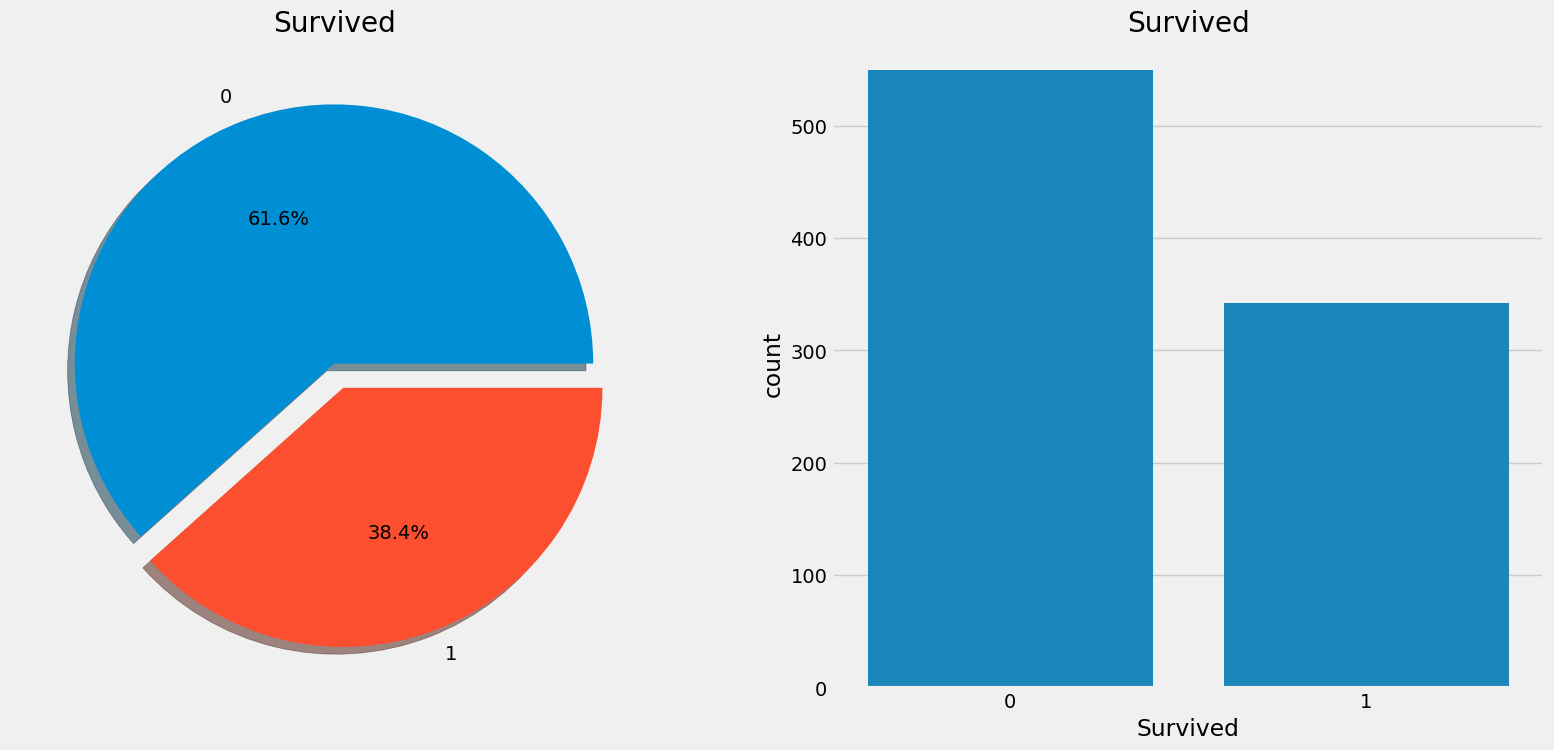

In [79]:
# 1: Survived
fig, ax = plt.subplots(1,2,figsize = (18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax=ax[0],shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived',data = data, ax = ax[1])
ax[1].set_title('Survived')

plt.show()

## Sex : Categorical

In [80]:
data.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

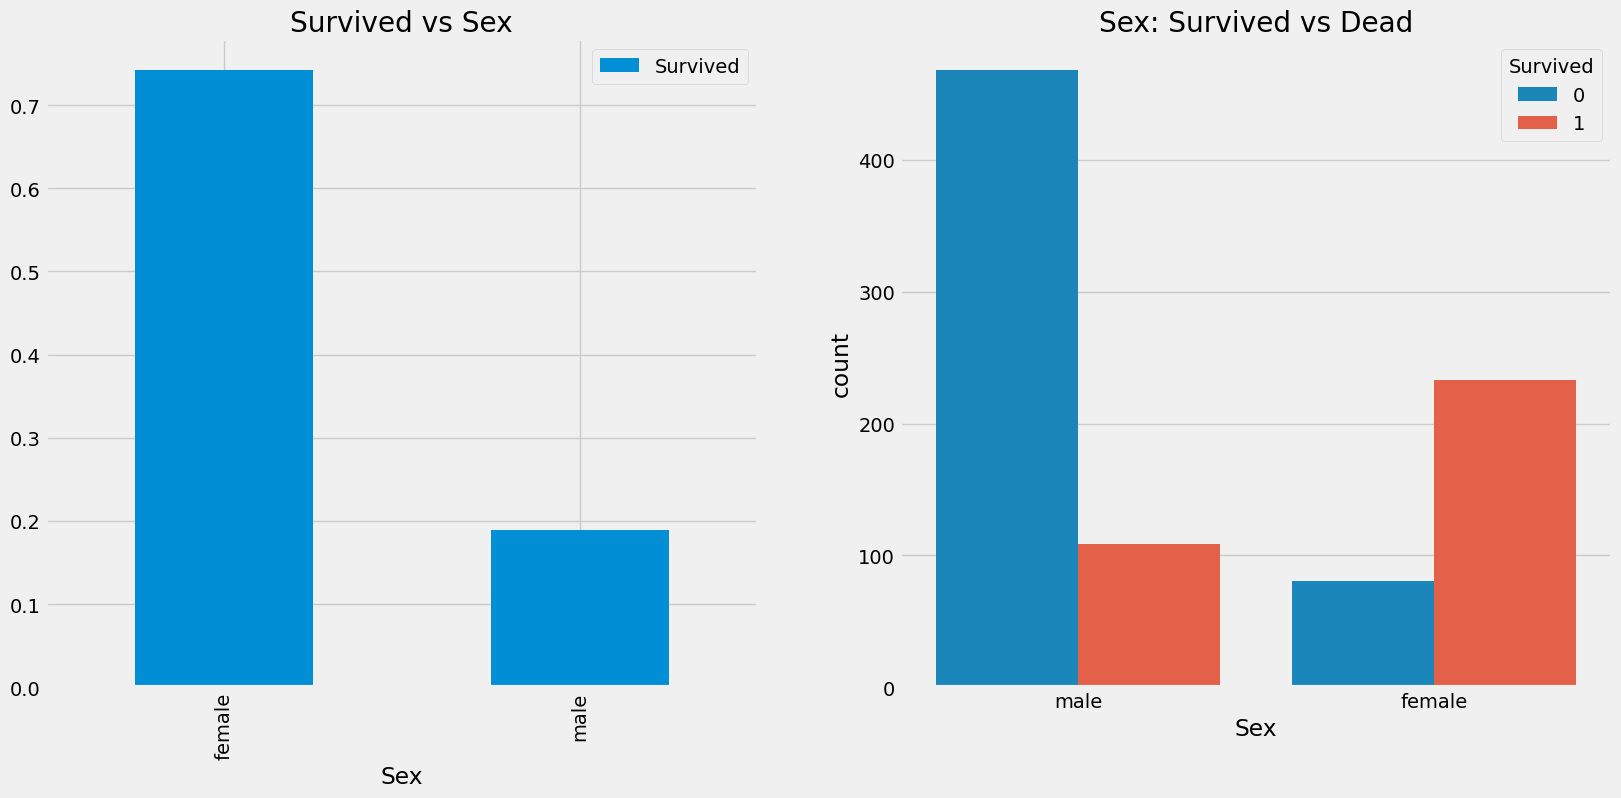

In [81]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue = 'Survived',data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

## PClass: Ordinal

In [82]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


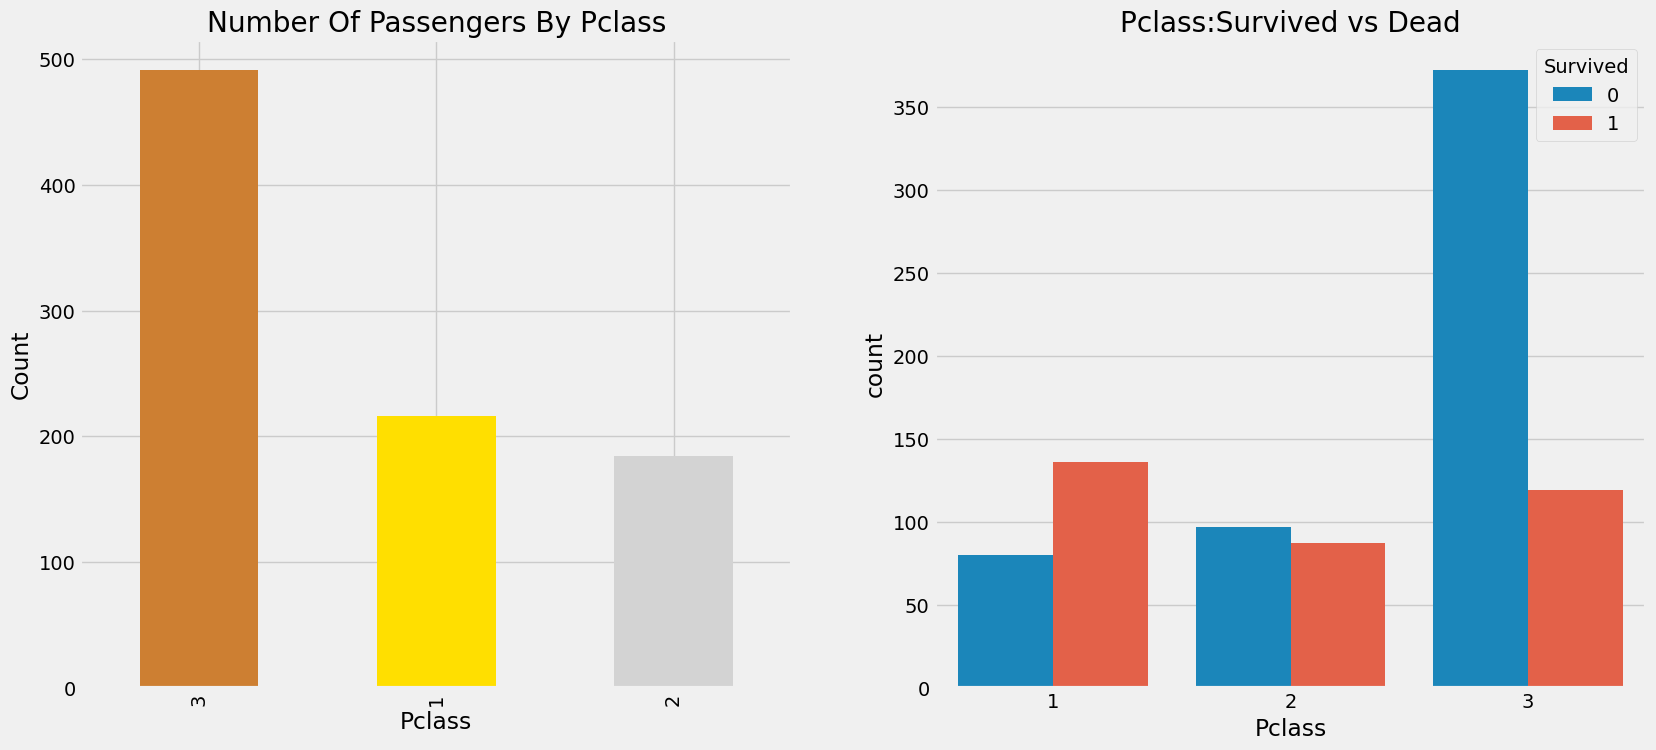

In [83]:
fig, ax = plt.subplots(1,2,figsize = (18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

In [84]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap = 'summer_r')

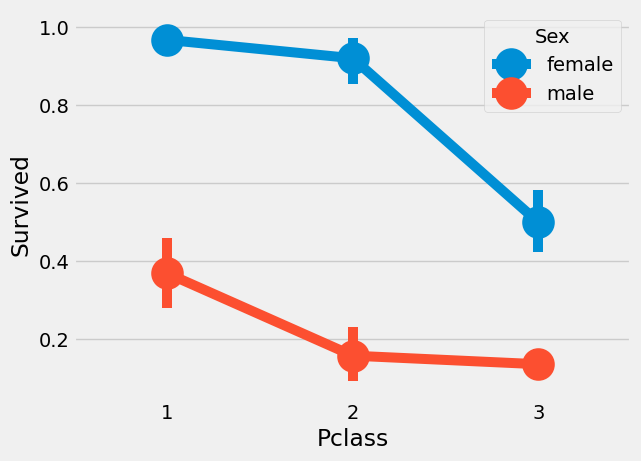

In [85]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data)
plt.show()

## Age : Continuous

In [86]:
print('Oldest Passenger was of :',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


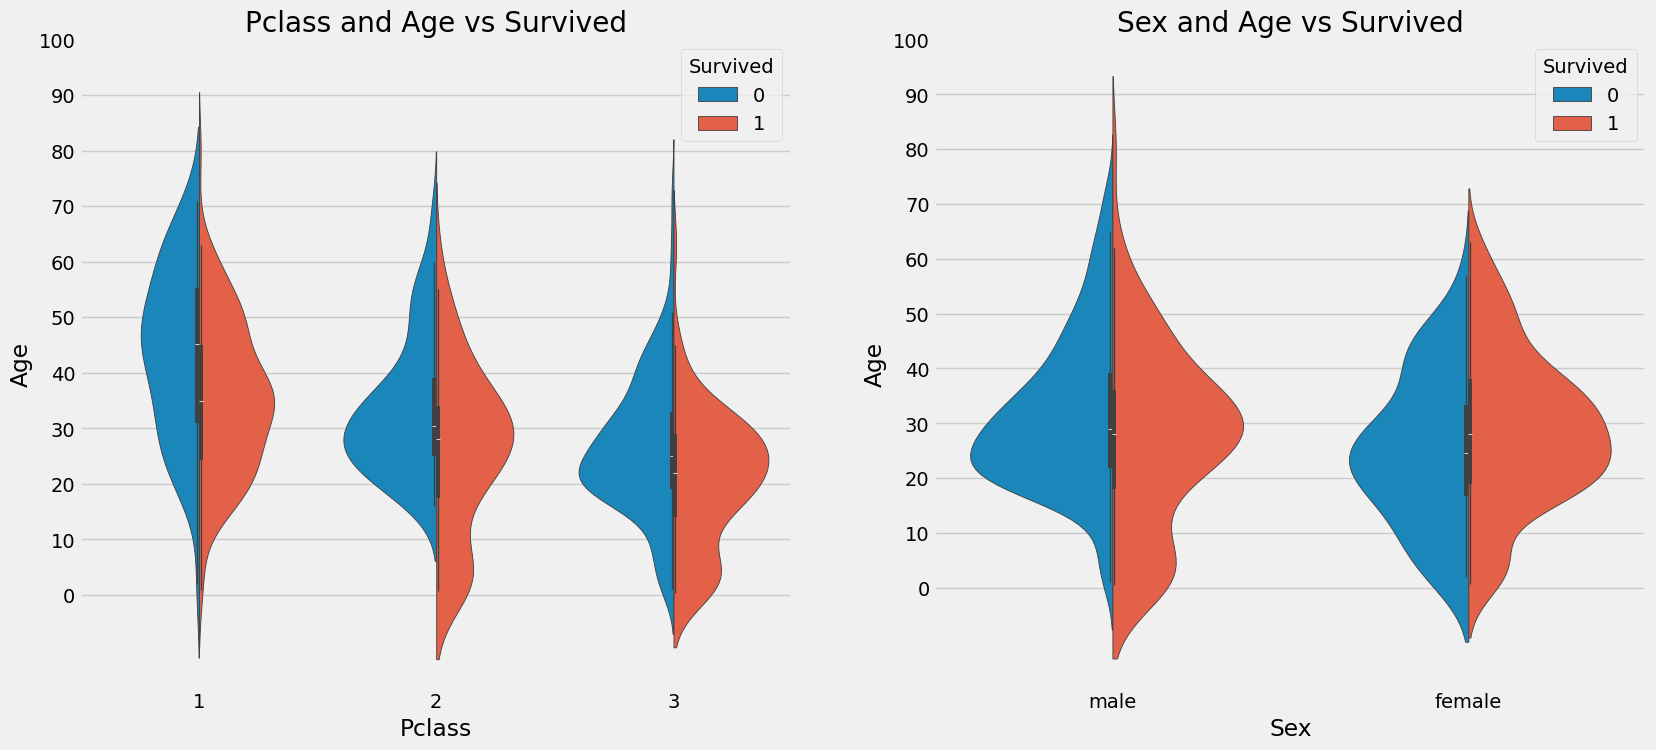

In [87]:
fig, ax = plt.subplots(1,2,figsize = (18,8))

sns.violinplot(x='Pclass',y='Age',hue = 'Survived', data = data, split = True,ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

## Age NULL 처리 : Using Names !!

In [88]:
data['Initial']=0

# looks for strings which lie between A-Z or a-z and followed by a .(dot)
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [89]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [90]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace = True)

In [91]:
data.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [92]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']= 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']= 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']= 46

In [93]:
data.Age.isnull().any()

False

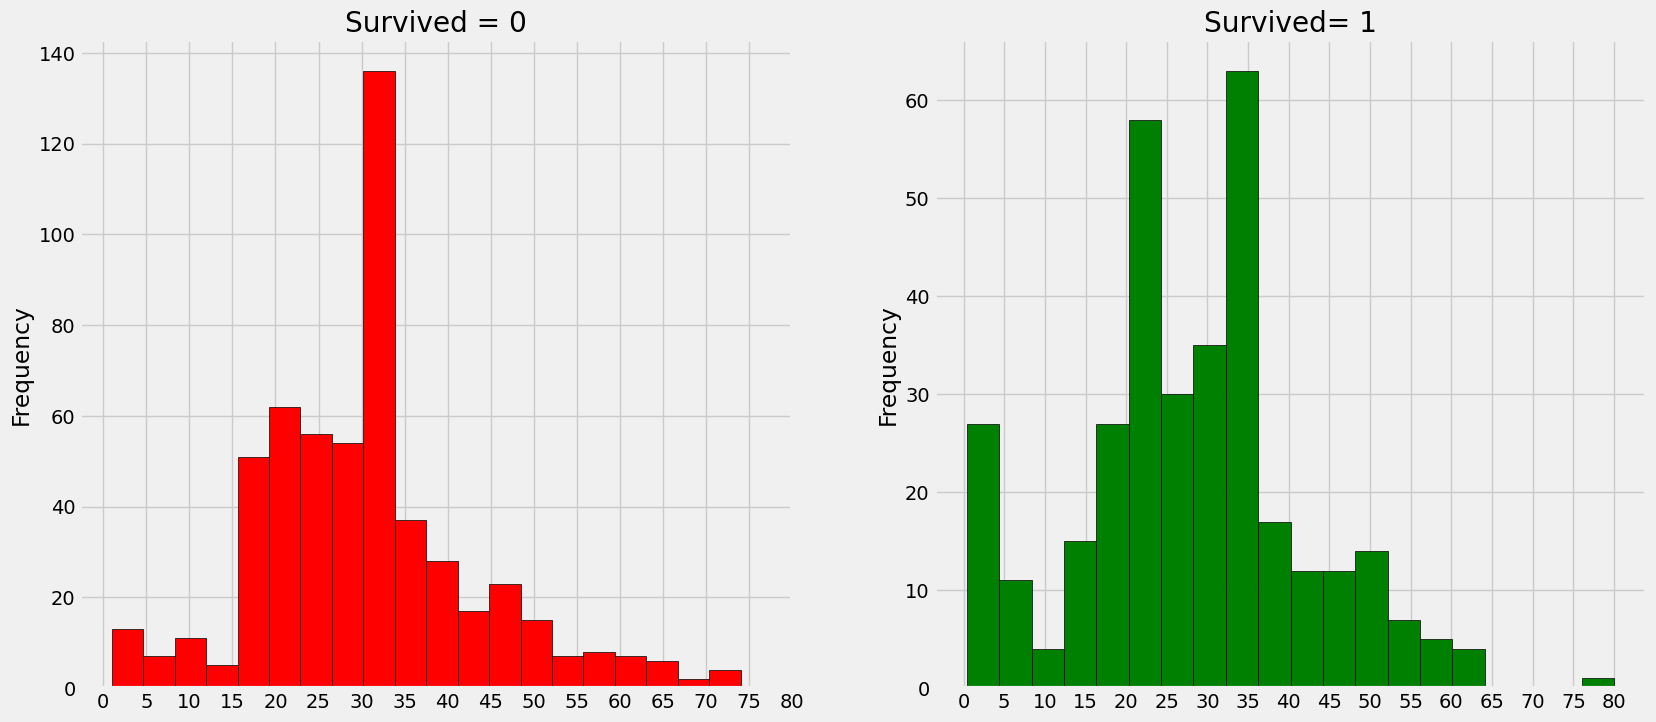

In [94]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins = 20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = range(0,85,5)
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

**Observations:**

1)The Toddlers(age<5) were saved in large numbers (The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

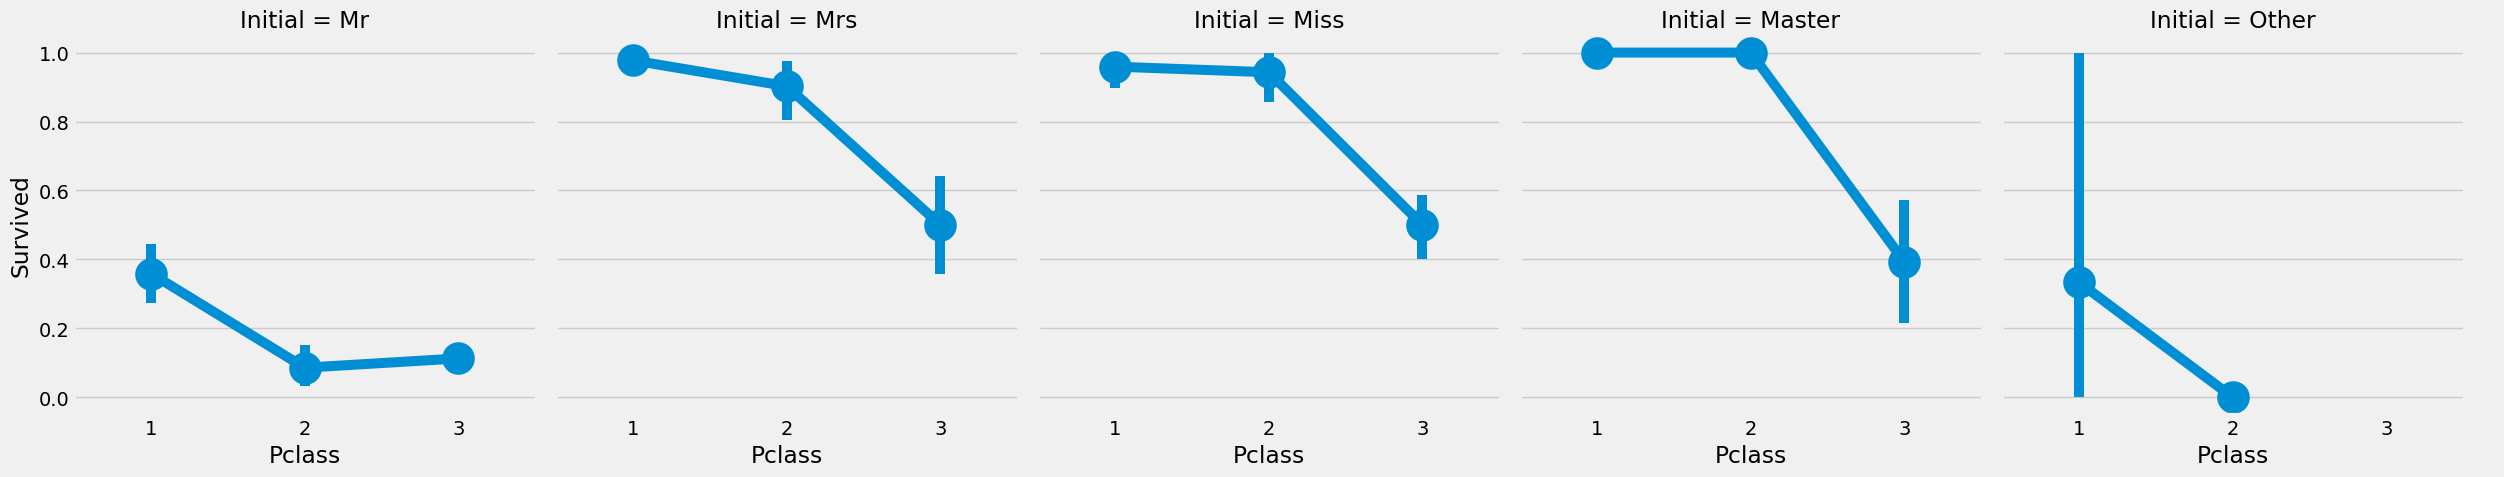

In [95]:
sns.catplot(x='Pclass',y='Survived',col = 'Initial',kind = 'point',data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

## Embarked : Categorical

In [96]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins = True).style.background_gradient(cmap = 'summer_r')

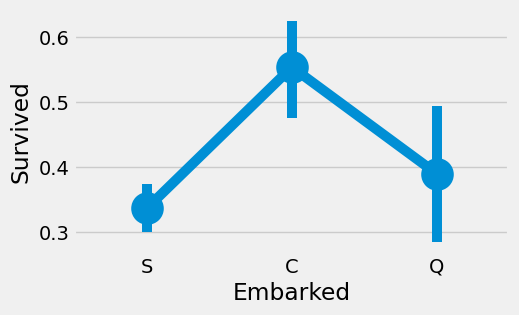

In [97]:
sns.pointplot(x='Embarked',y='Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

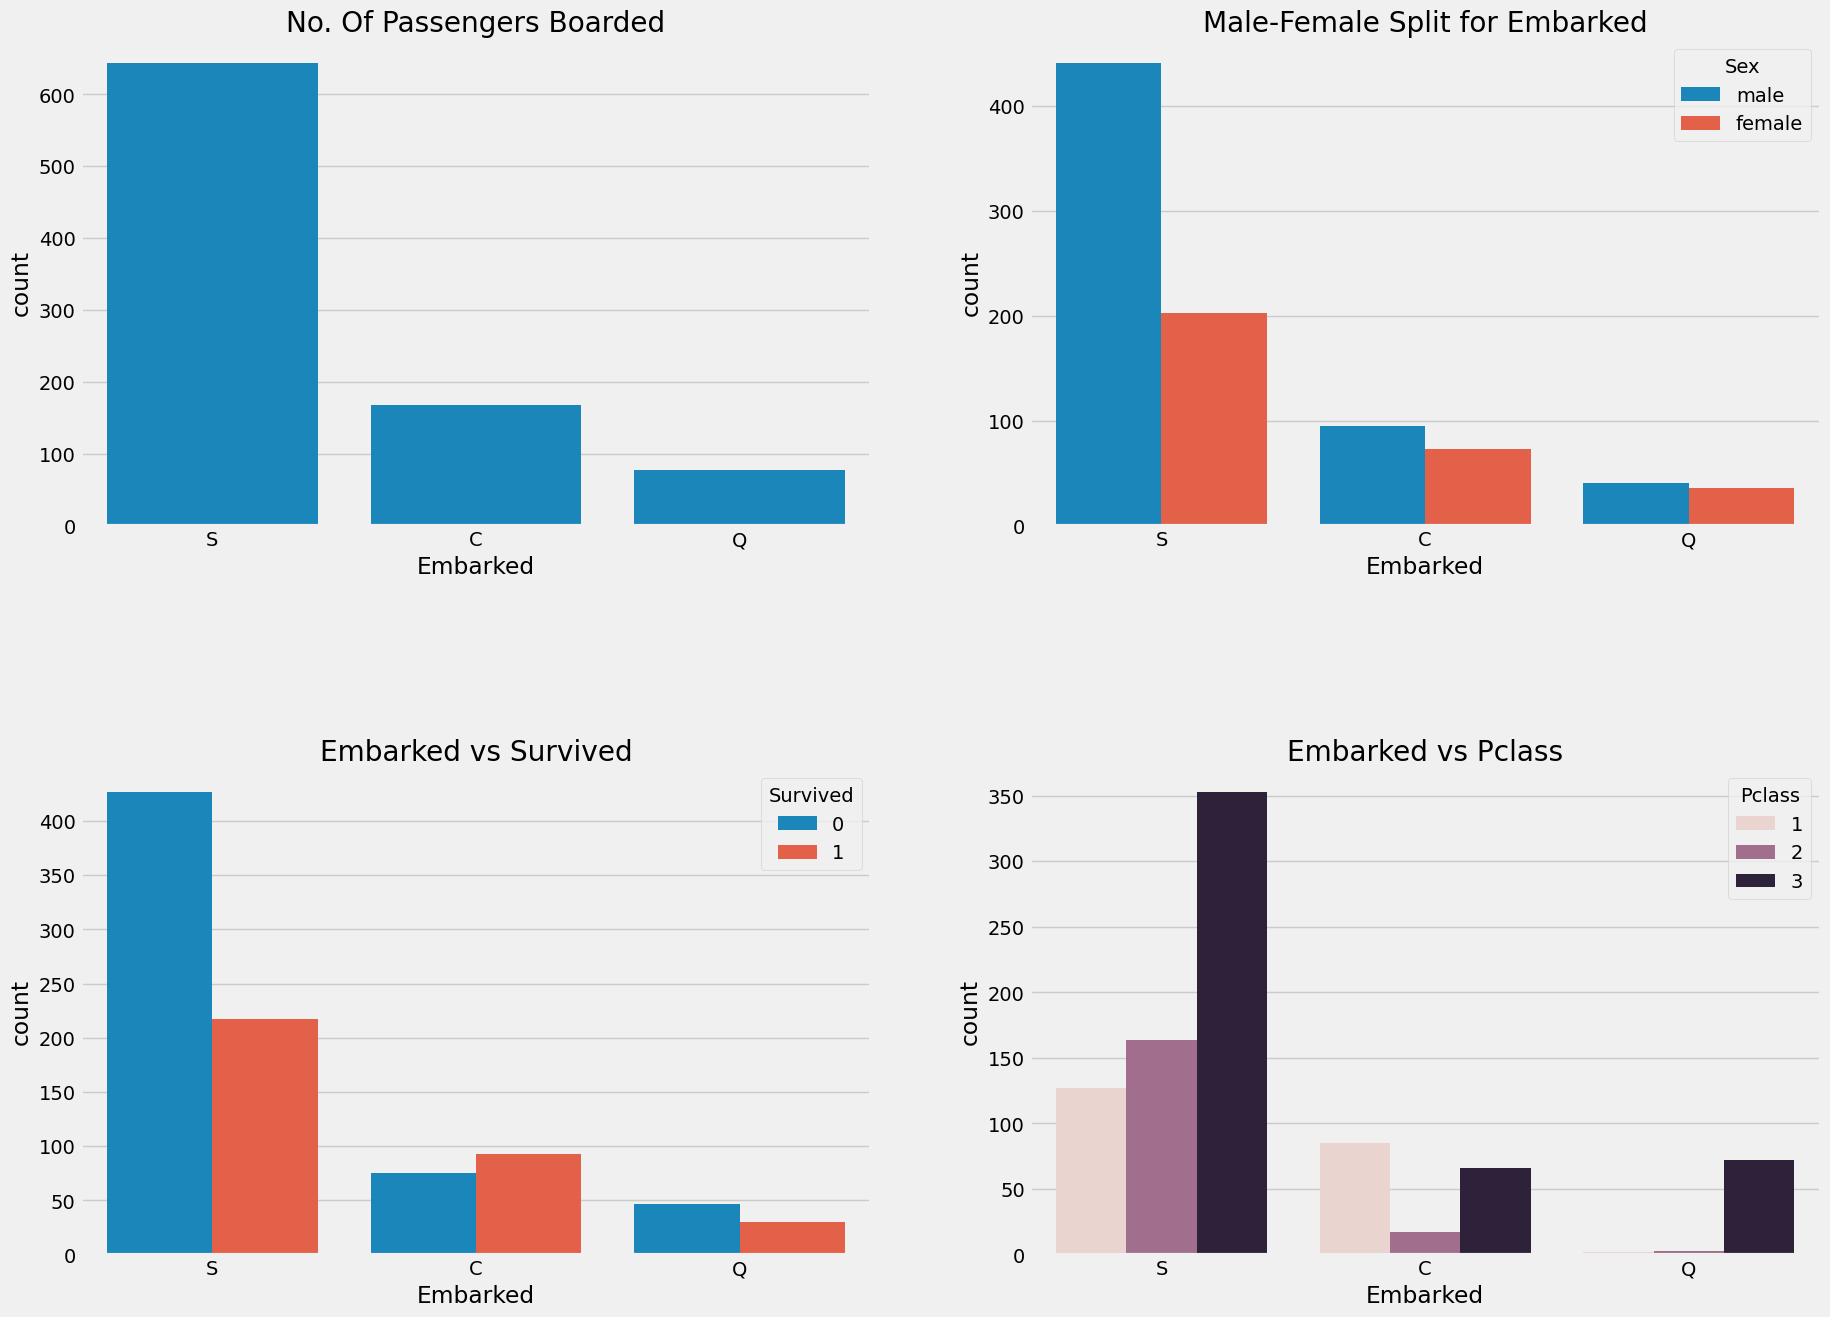

In [98]:
fig,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**

1) Maximum passenegers boarded from S. Majority of them being from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass3.

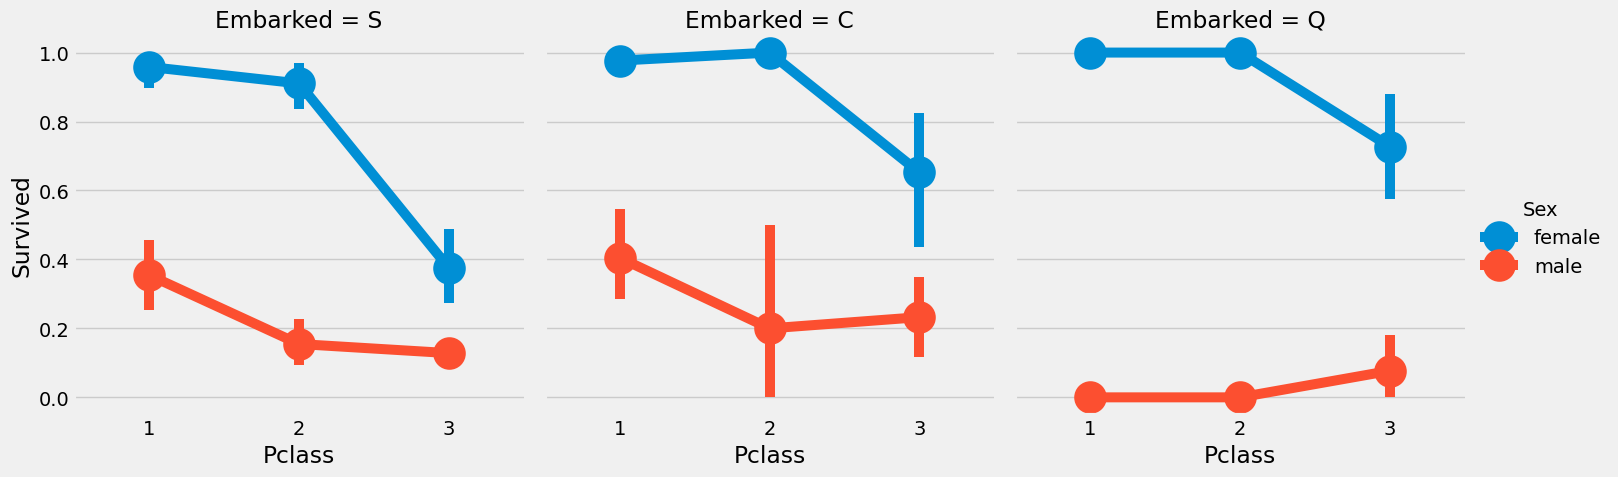

In [99]:
sns.catplot(x='Pclass',y='Survived',hue = 'Sex', col = 'Embarked',kind='point',data = data)
plt.show()

**Observations:**
1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2) Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3) Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

## Filling Embarked NaN

In [100]:
data['Embarked'].fillna('S',inplace = True)

In [101]:
data.Embarked.isnull().any()

False

## SibSip : Discrete

In [102]:
pd.crosstab(data.SibSp,data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


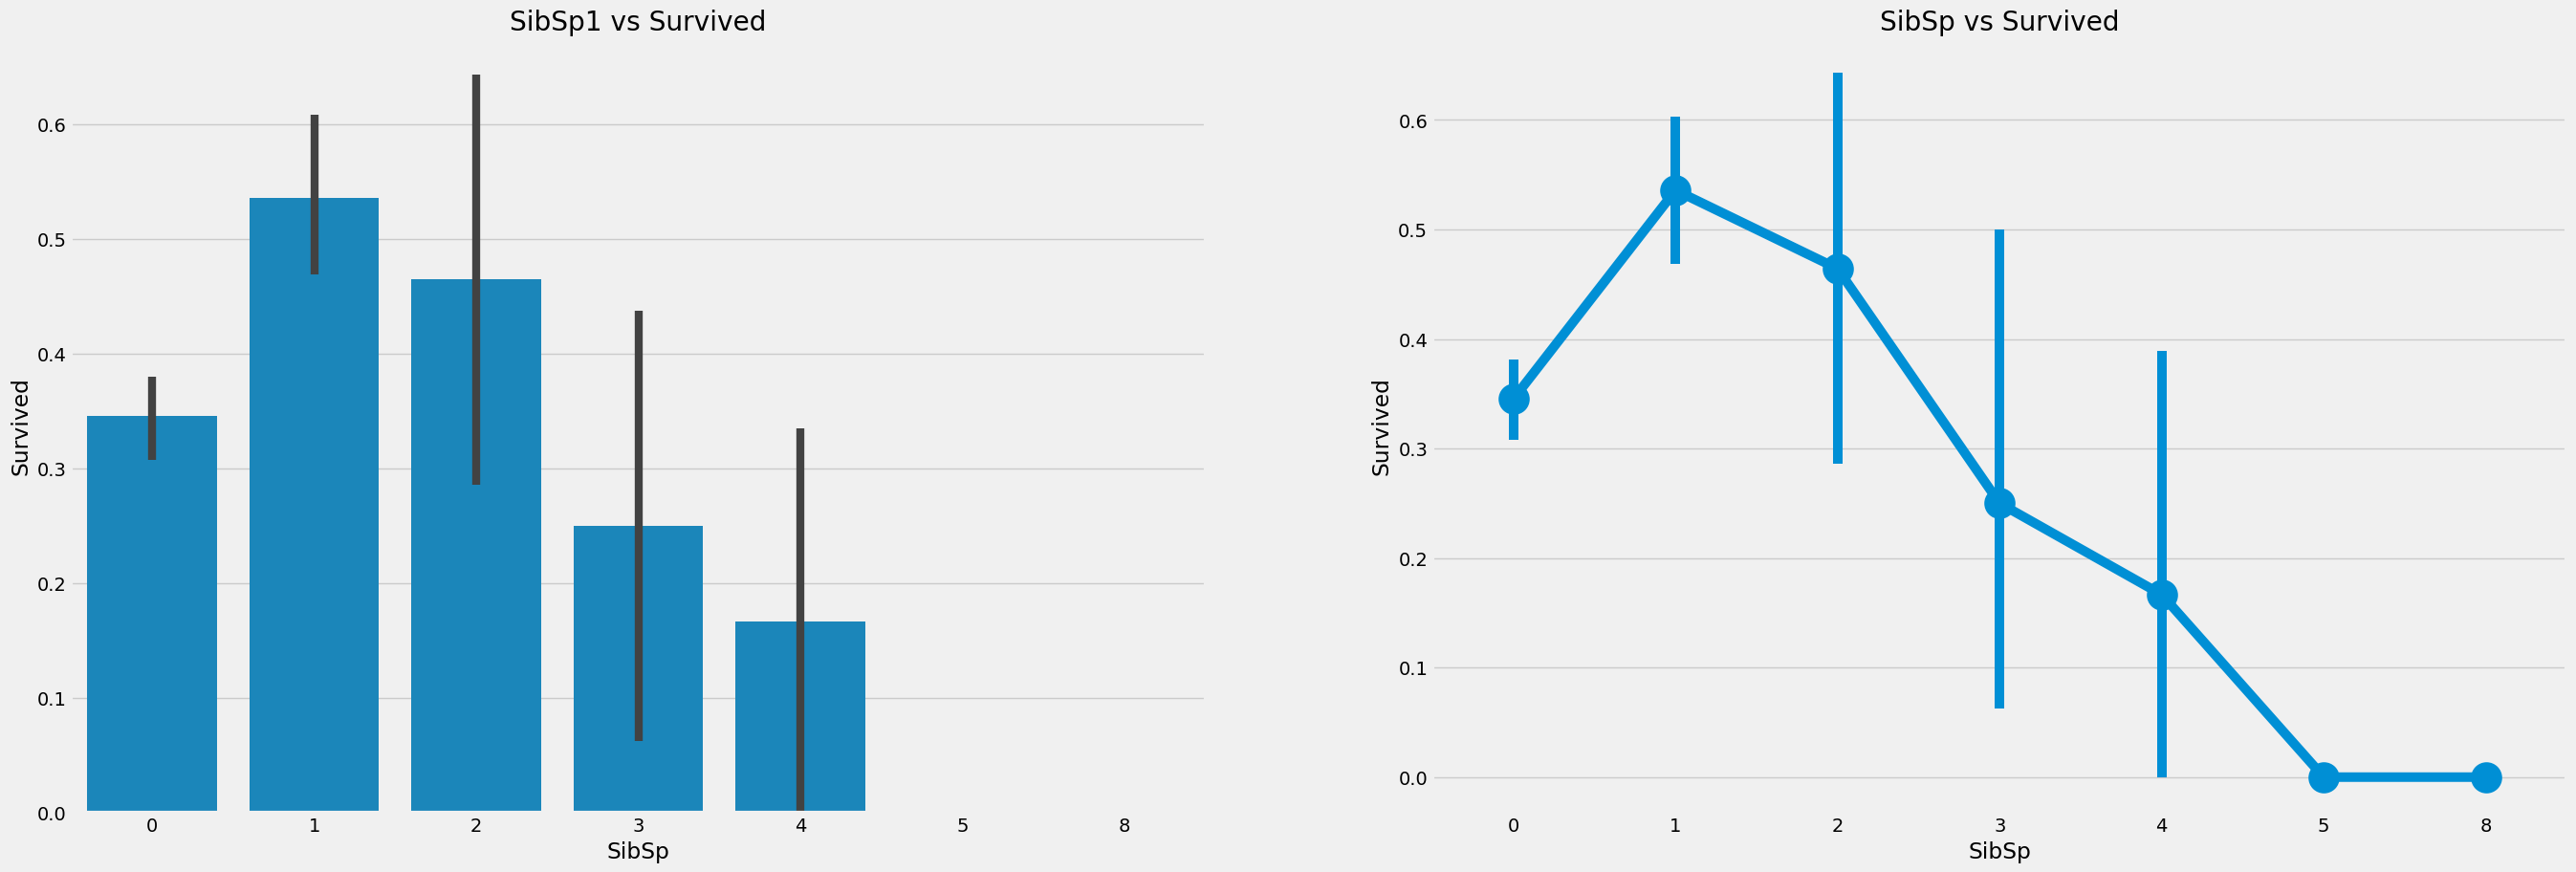

In [103]:
fig, ax=plt.subplots(1,2,figsize=(30,10))

sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp1 vs Survived')

sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [104]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%.

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## Parch

In [105]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


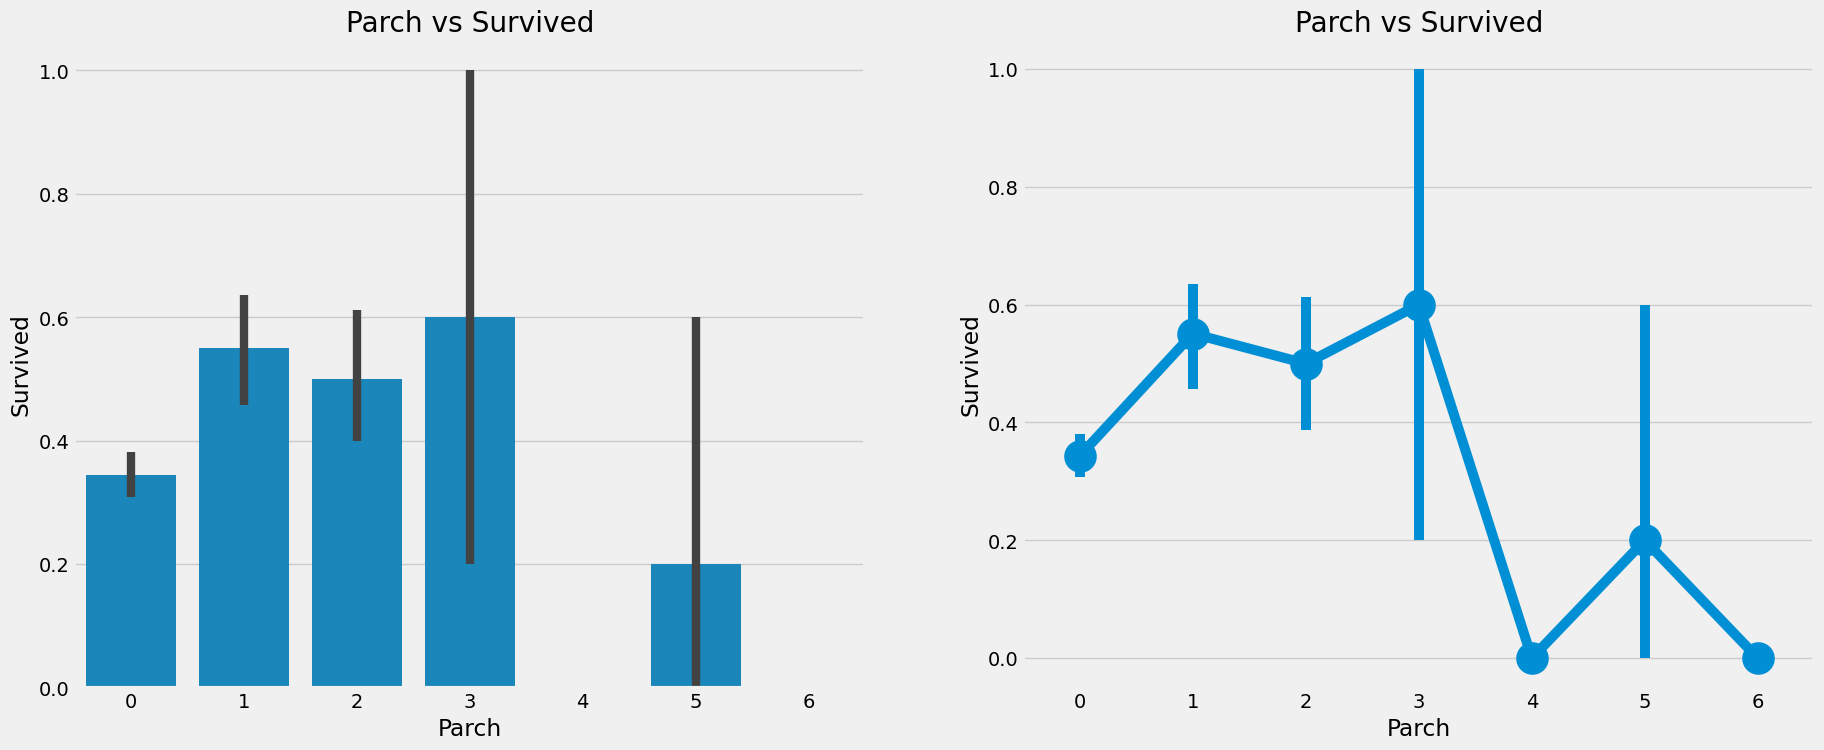

In [106]:
fig, ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

**Observations:**

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

## Fare : Continuous

In [107]:
print('Highest Fare was:',data.Fare.max())
print('Lowest Fare was:',data.Fare.min())
print('Average Fare was:',data.Fare.mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


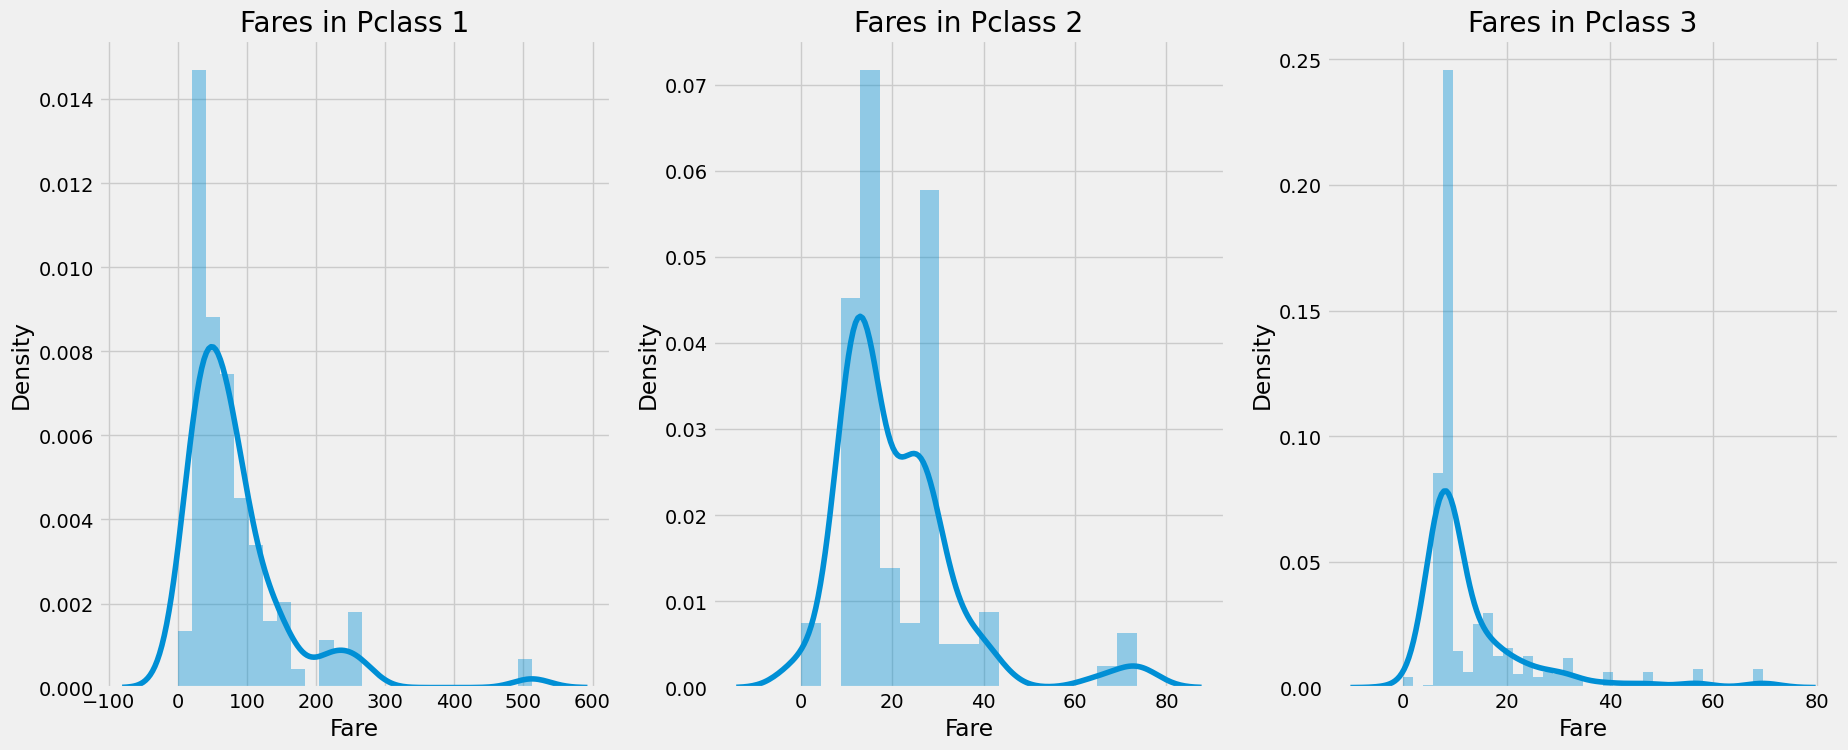

In [108]:
fig, ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Observations in a Nutshell for all features:

* Sex: The chance of survival for women is high as compared to men.

* Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

* Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

* Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

* Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

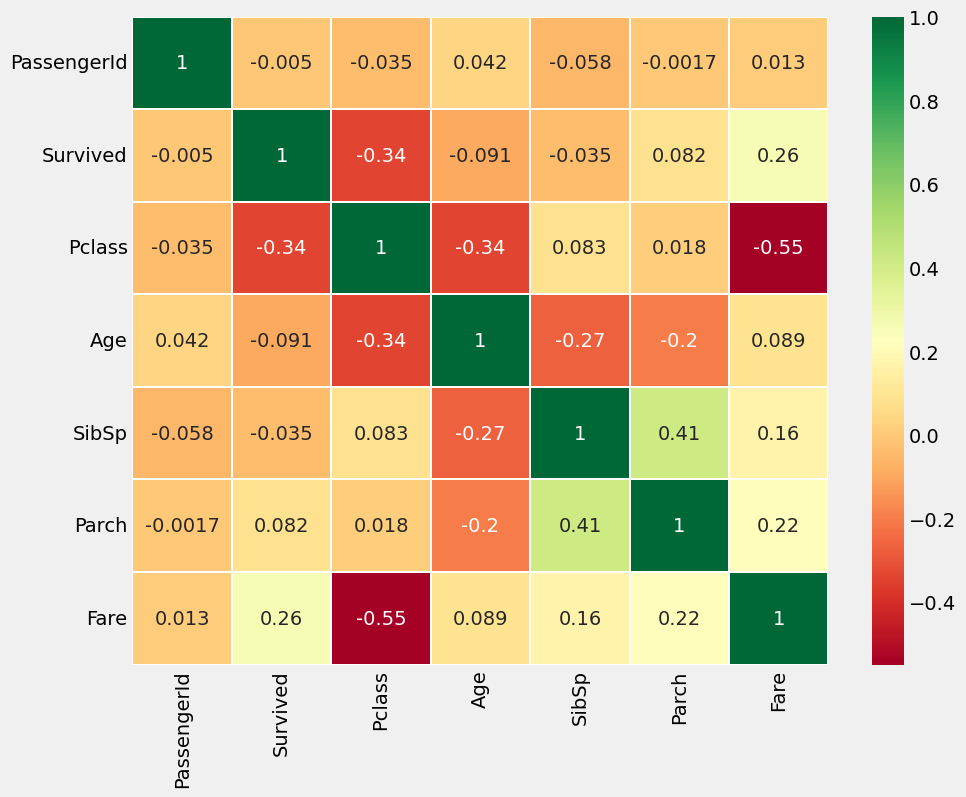

In [109]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot = True, cmap='RdYlGn',linewidths=0.2)
# Recall heatmap: annot 인자는 True/False로 설정할 수 있으며 True일 경우 숫자로 된 상관계숫값을 표시. fmt 인자로 숫자값 의 포맷을 변환할 수 있음.
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

From the above heatmap,we can see that the features are not much correlated

# Part 2: Feature Engineering and Data Cleaning

## Age_band

In [110]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band'] = 3
data.loc[data['Age']>64,'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [111]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


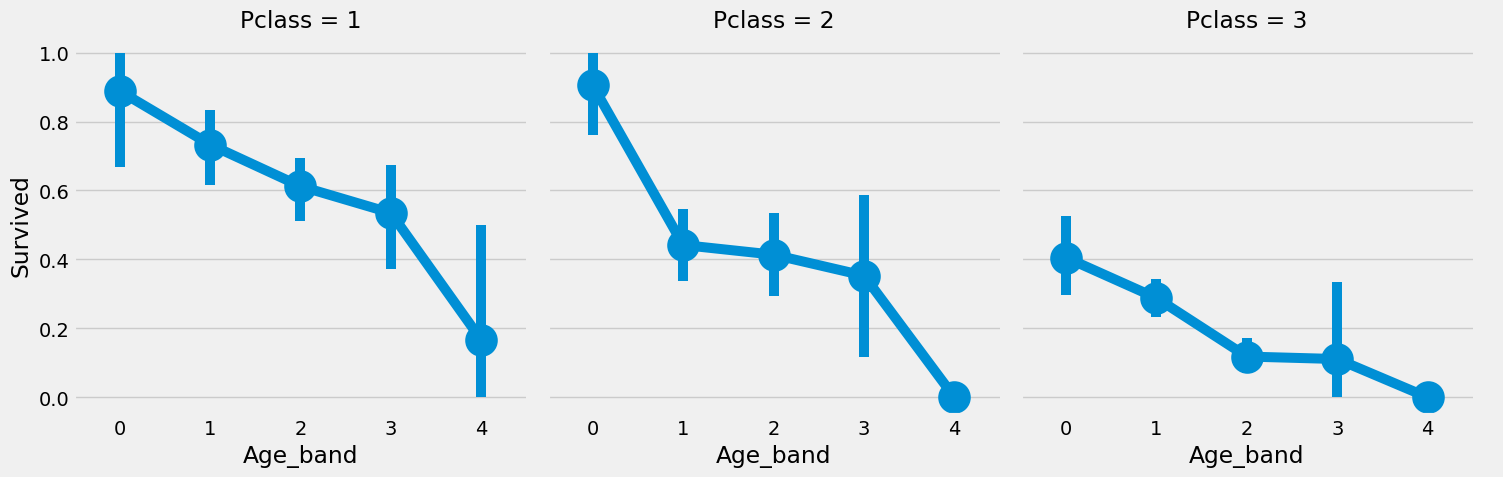

In [112]:
sns.catplot(x='Age_band',y='Survived',col='Pclass',kind='point',data=data)
plt.show()
# the survival rate decreases as the age increases irrespective of the Pclass

## Family_Size and Alone

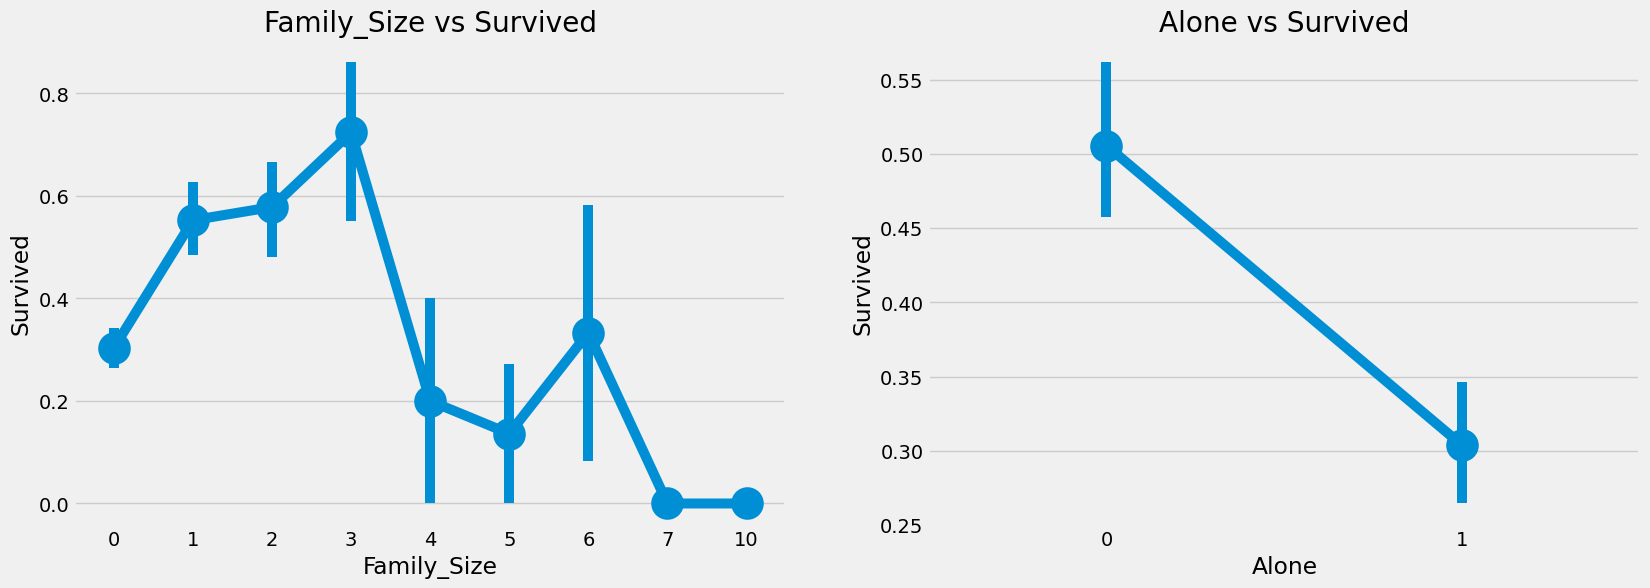

In [113]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data['Family_Size']==0,'Alone'] = 1

fig,ax = plt.subplots(1,2,figsize = (18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

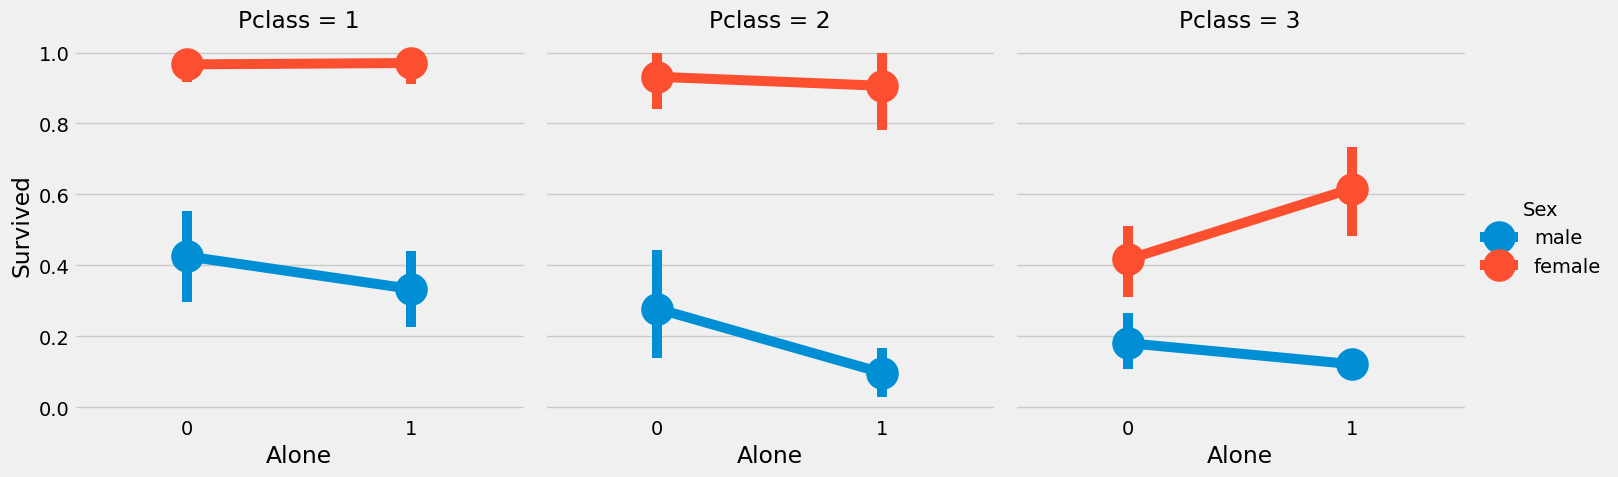

In [114]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family

## Fare_Range

In [115]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
# qcut splits or arranges the values according to the number of bins we have passed
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare_range increases, the chances of survival increases.

In [116]:
# convert it into singleton values
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

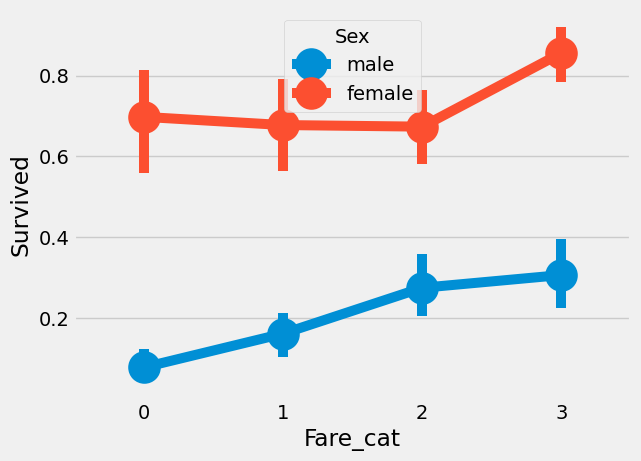

In [117]:
sns.pointplot(x='Fare_cat',y='Survived',hue='Sex',data=data)
plt.show()

Fare_cat increases, the survival chances increases

## Converting String Values into Numeric

In [118]:
data['Sex'].replace(['male','female'],[0,1],inplace = True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

* Name : We don't need name feature as it cannot be converted into any categorical value.

* Age : We have the Age_band feature, so no need of this.

* Ticket : It is any random string that cannot be categorised.

* Fare : We have the Fare_cat feature, so unneeded

* Cabin : A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

* Fare_Range : We have the fare_cat feature.

* PassengerId : Cannot be categorised.

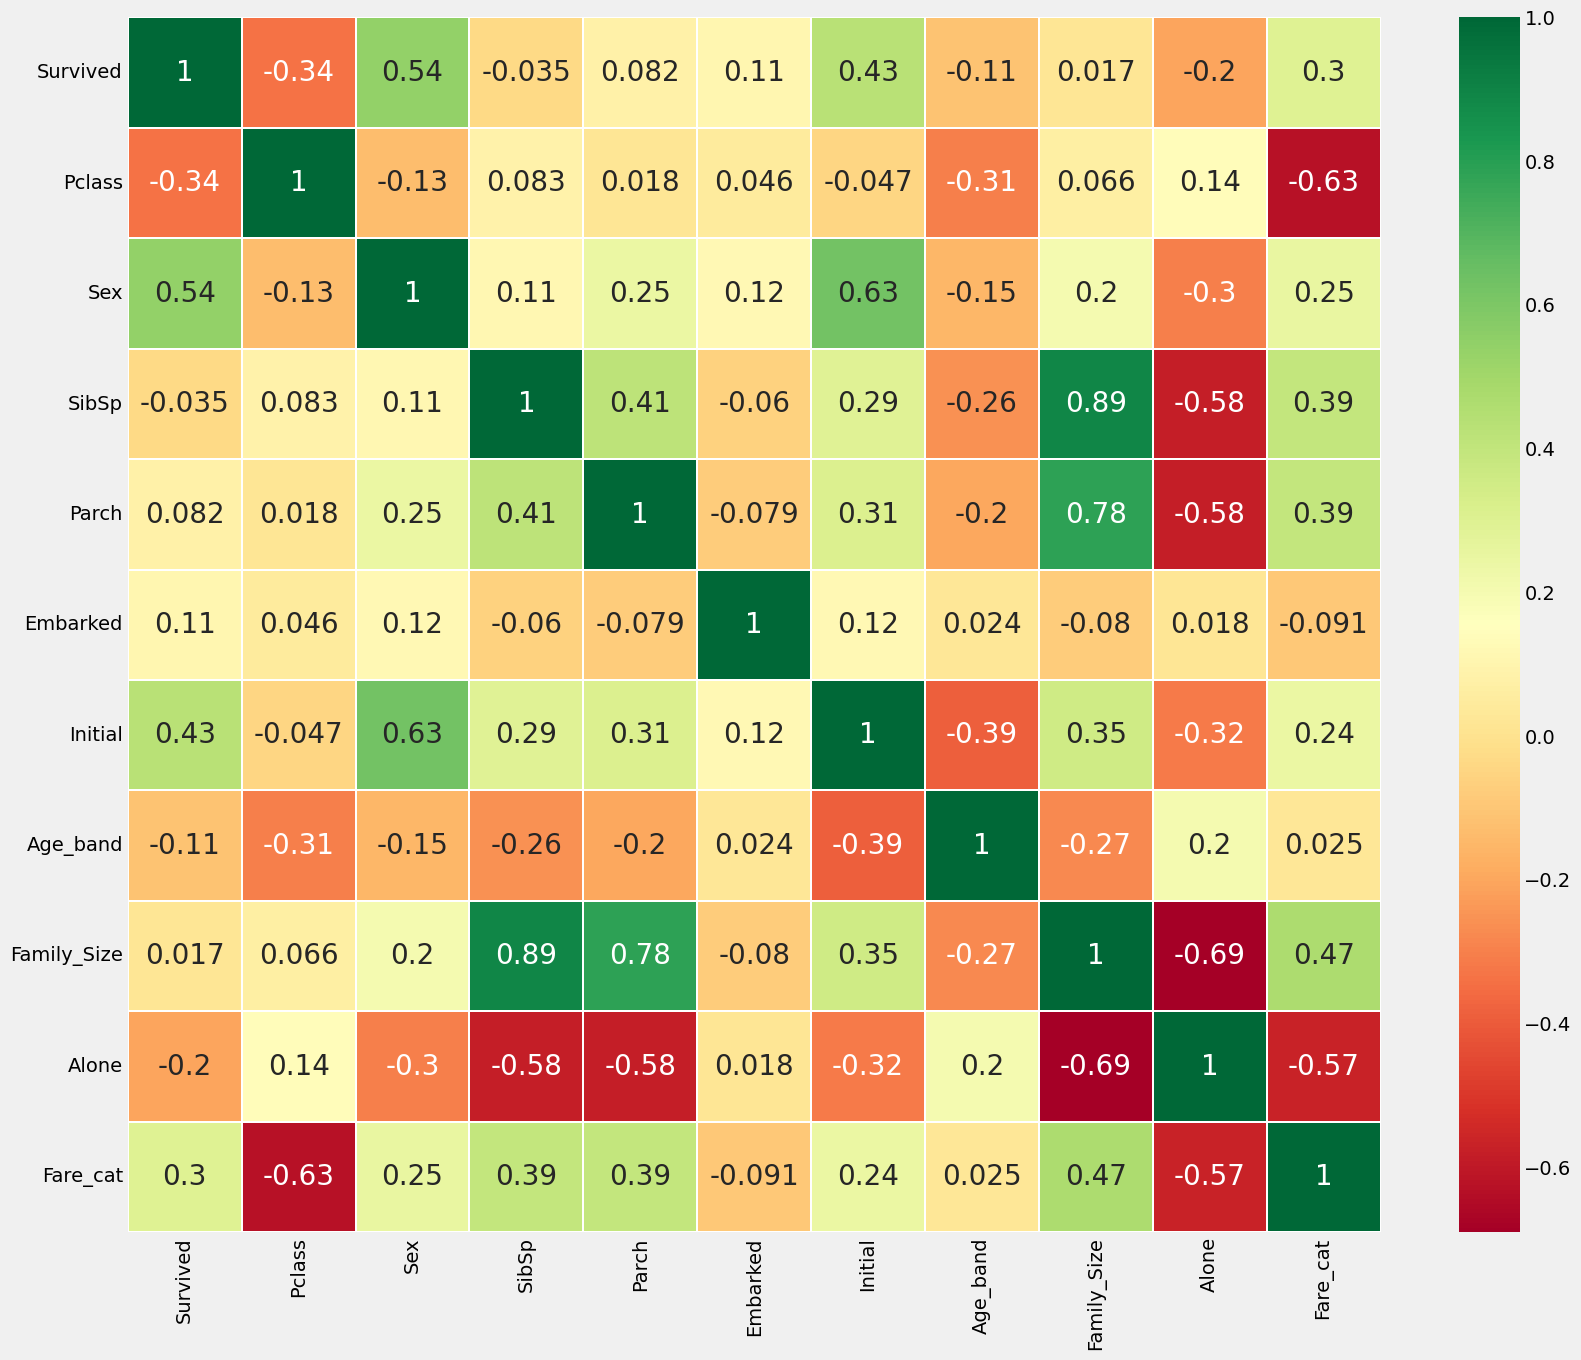

In [119]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18,15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Part 3 : Predictive Modeling

In [147]:
#importing all the required ML packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [148]:
train,test = train_test_split(data,test_size = 0.3, random_state = 0,stratify=data['Survived'])
# "stratify" parameter is used to ensure that the class distribution in the training and testing sets mirrors that of the original dataset

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

scores = []

### Radial Support Vector Machines(rbf-SVM)¶

In [149]:
model = svm.SVC(kernel = 'rbf',C=1,gamma = 0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))
scores.append(metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [150]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))
scores.append(metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [151]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
scores.append(metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [152]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
scores.append(metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


### K-Nearest Neighbours(KNN)¶

In [153]:
model = KNeighborsClassifier() # default : 5
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))
scores.append(metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


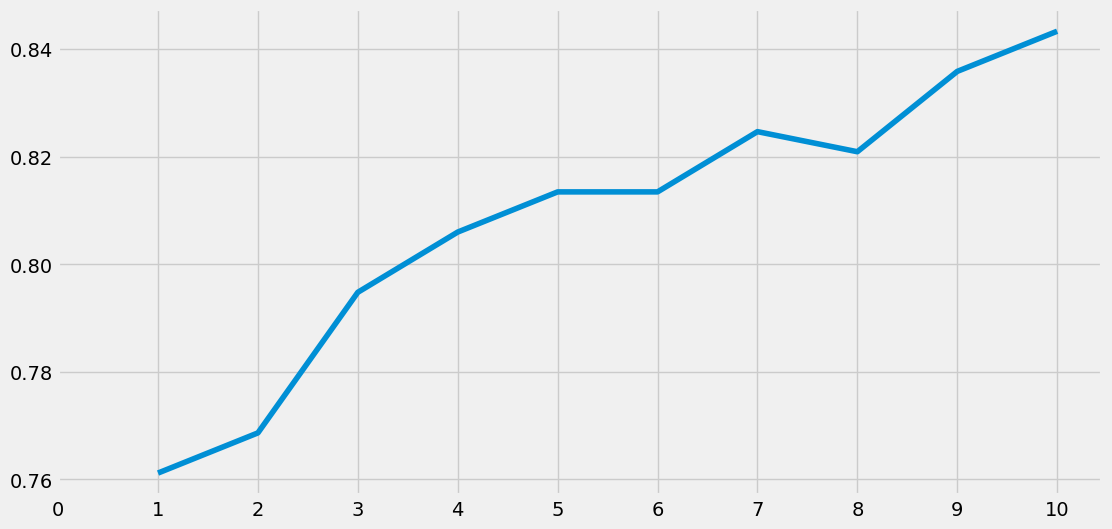

Accuracies for different values of n are: [0.7611940298507462, 0.7686567164179104, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8134328358208955, 0.8246268656716418, 0.8208955223880597, 0.835820895522388, 0.8432835820895522] with the max value as  0.8432835820895522


In [154]:
a_index = list(range(1,11))
a = []
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a.append(metrics.accuracy_score(prediction,test_Y))

plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are:',a,'with the max value as ',max(a))

## Gaussian Naive Bayes

In [155]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
scores.append(metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [156]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))
scores.append(metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


In [158]:
pd.DataFrame({'Model':models,'Accuracy':scores})

,Model,Accuracy
0,"SVC(C=1, gamma=0.1)",0.835821
1,"SVC(C=0.1, gamma=0.1, kernel='linear')",0.817164
2,LogisticRegression(),0.813433
3,DecisionTreeClassifier(),0.813433
4,KNeighborsClassifier(),0.813433
5,GaussianNB(),0.813433
6,"(DecisionTreeClassifier(max_features='sqrt', r...",0.813433


The accuracy of a model is not the only factor that determines the robustness of the classifier. As the training and testing data changes, the accuracy will also change which is known as **model variance**

## Cross Validataion
Many a times, the data is imbalanced.

In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 10, random_state = 22,shuffle = True)
xyz = []
accuracy = []
std = []

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv = kfold,scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.812634,0.041063
Decision Tree,0.804744,0.047310
Naive Bayes,0.795843,0.054861
Random Forest,0.807016,0.045683


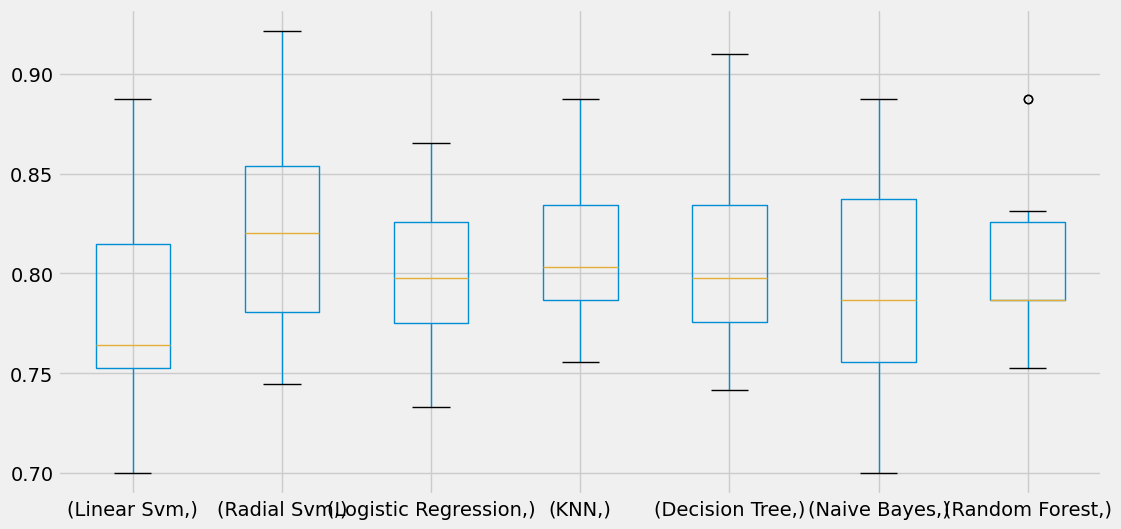

In [132]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot() # categories on the x-axis and values on the y-axis.
plt.show()

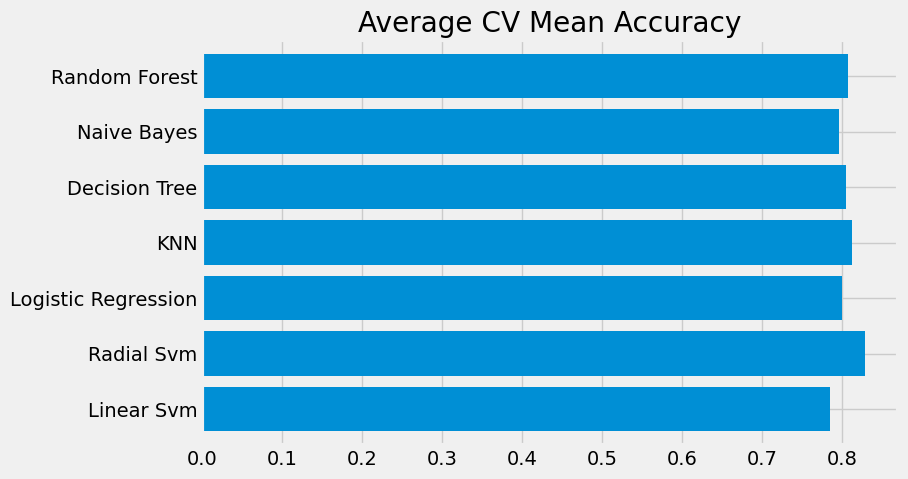

In [133]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
# Recall plot.barh : horizontal bar plot using Matplotlib

plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier

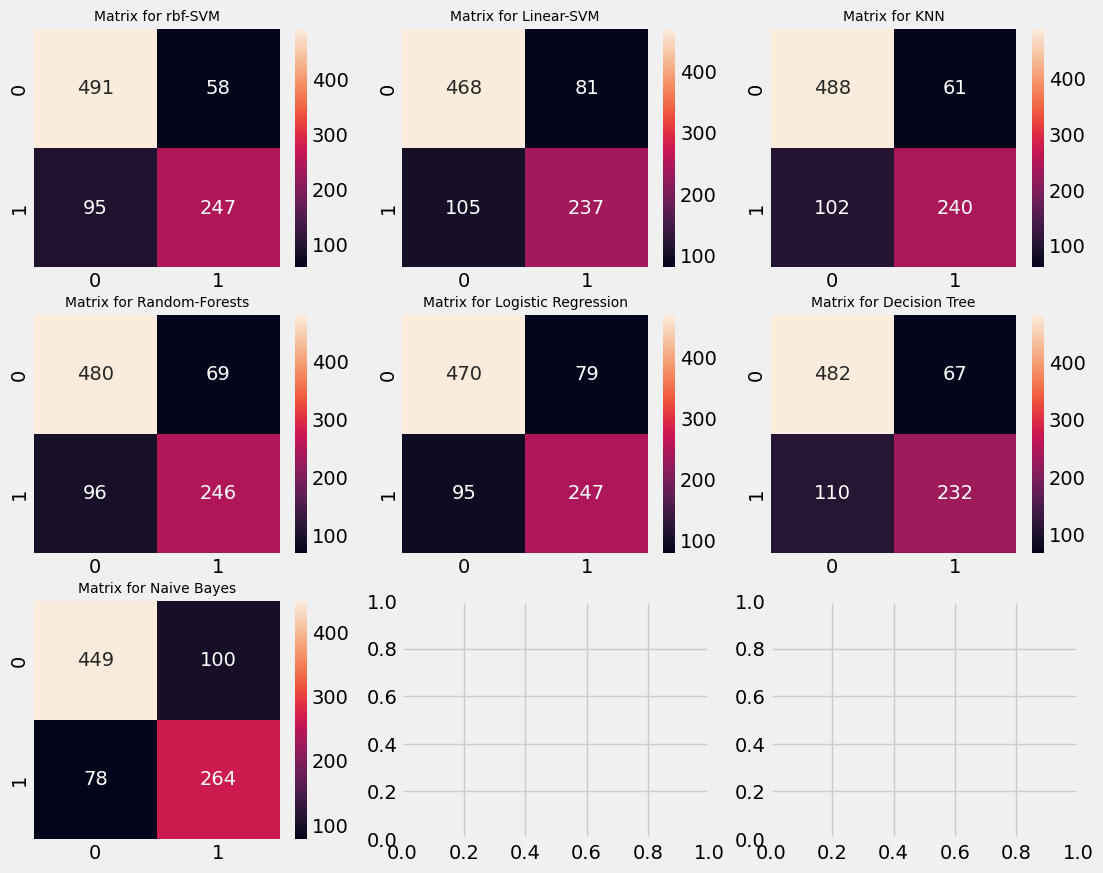

In [134]:
fig,ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'),X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM',fontsize=10)

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM',fontsize=10)

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN',fontsize=10)

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests',fontsize=10)

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression',fontsize=10)

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree',fontsize=10)

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes',fontsize=10)

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived

## Hyper-Parameters Tuning

### SVM

In [135]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rgb','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}

gd = GridSearchCV(estimator = svm.SVC(),param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8091833532107213
SVC(C=0.05, gamma=0.1, kernel='linear')


### Random Forests

In [136]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.82045069361622
RandomForestClassifier(n_estimators=400, random_state=0)


# Ensembling

### Voting Classifier

In [137]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors = 10)),
                                                ('RBF',svm.SVC(probability = True, kernel = 'rbf',C = 0.5, gamma = 0.1)),
                                                ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                ('LR',LogisticRegression(C=0.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))],voting='soft').fit(train_X,train_Y)

print('The accuracy for emsemble model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv = 10, scoring = 'accuracy')
print('The cross validated score is',cross.mean())

The accuracy for emsemble model is: 0.8246268656716418
The cross validated score is 0.8249188514357055


### Bagging
Bagging KNN

In [138]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3),random_state = 0, n_estimators = 700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


Bagged Decision Tree

In [139]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state = 0, n_estimators = 100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model, X ,Y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8160174781523096


### Boosing
AdaBoost

In [140]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


Stochastic Gradient Boosting

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


xgboost

In [142]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 998, learning_rate = 0.1)
result = cross_val_score(xgboost,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8194007490636703


Hyper-Parameter Tuning for AdaBoost

In [143]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper  = {'n_estimators':n_estimators,
          'learning_rate':learn_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


Confusion Matrix for AdaBoost

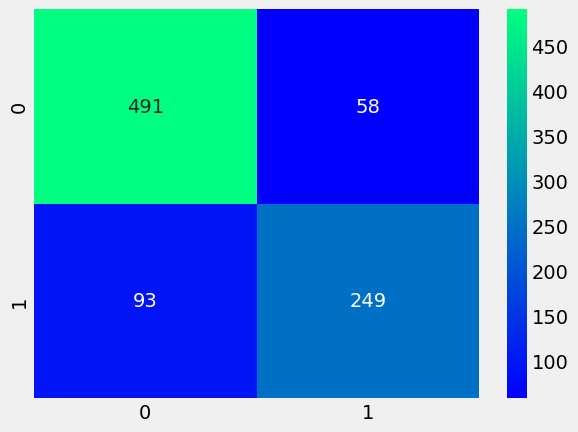

In [144]:
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.05)
result = cross_val_predict(ada,X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y,result),cmap = 'winter', annot = True, fmt = '2.0f')
plt.show()

Feature Importance

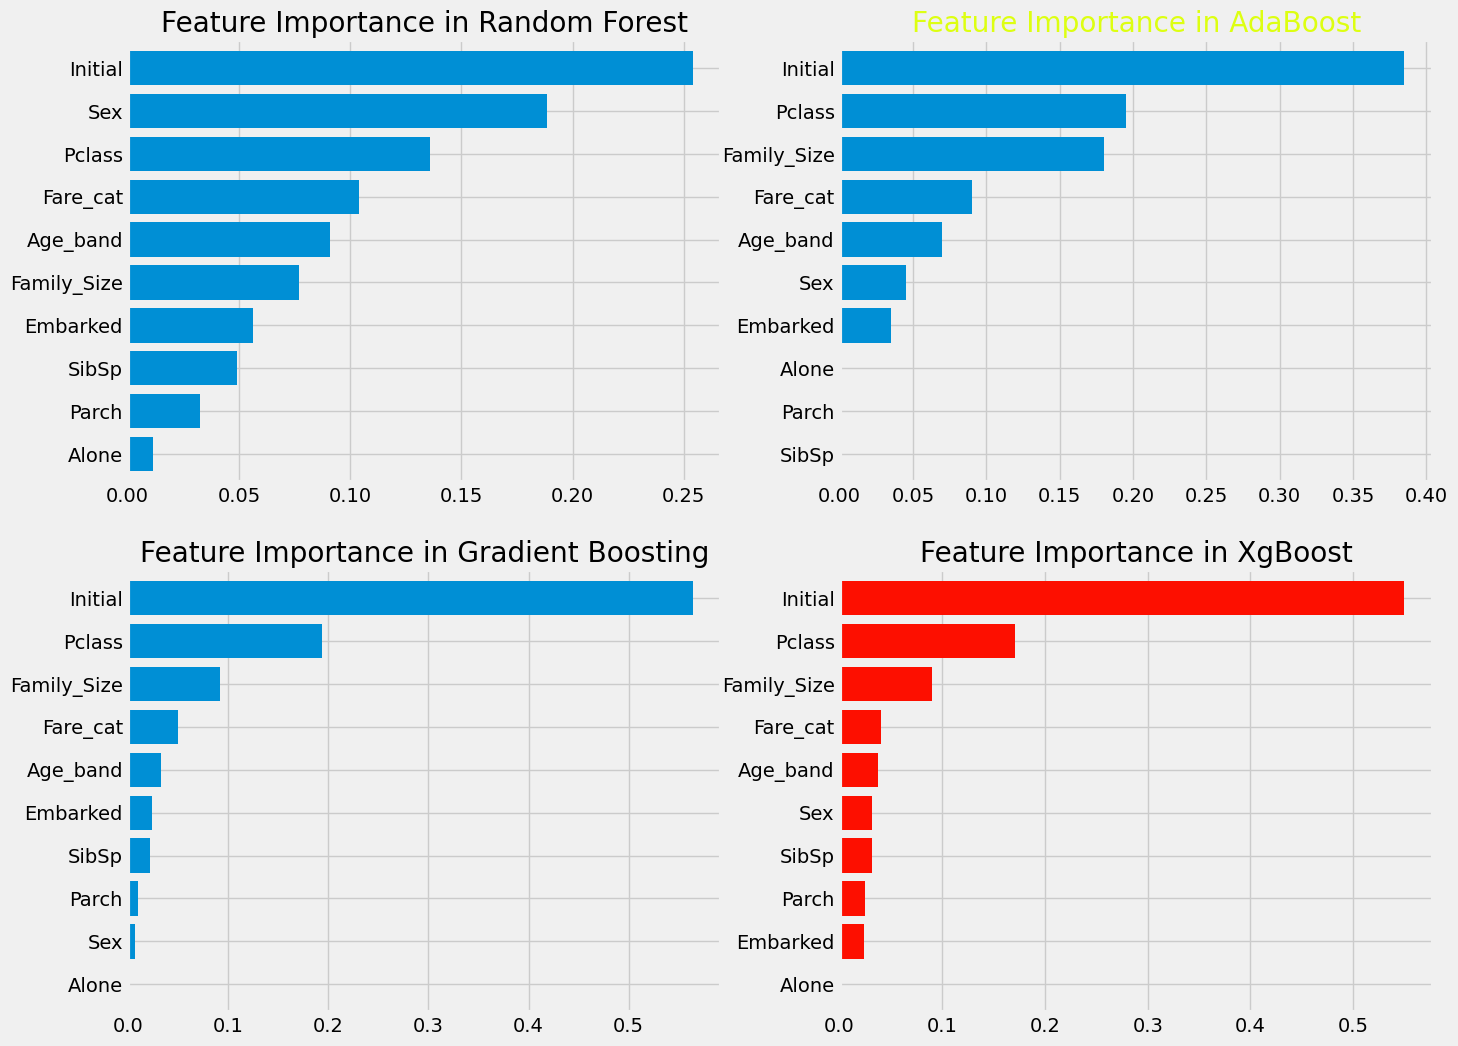

In [145]:
fig,ax = plt.subplots(2,2,figsize = (15,12))

model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width=0.8,ax = ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.05, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width=0.8,ax = ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost',color='#ddff11')

model = GradientBoostingClassifier(n_estimators = 500,learning_rate = 0.1,random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width = 0.8,ax = ax[1,0])
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators = 900,learning_rate = 0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width = 0.8,ax =  ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

**Observations:**

1) Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2) The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

    However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3) Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.